# Monte Carlo Simulation with Dollar-Cost Averaging

In [1]:
# SPY and VOO

# Import Libraries

In [2]:
import datetime
import calendar
import random
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Obtain SPY Data

In [3]:
# Import SPY data (inception date to present) from Yahoo Finance

# Inception Date (Yahoo Finance)
spy_start = datetime.datetime(1993,1,22)

# Today's Date
spy_end = datetime.date.today()

# Pull Data
df_spy = web.DataReader('SPY','yahoo',spy_start,spy_end)

# Reset index after creating date column
df_spy = df_spy.reset_index()
df_spy

,Date,High,Low,Open,Close,Volume,Adj Close
0,1993-01-29,43.968750,43.750000,43.968750,43.937500,1003200.0,26.299288
1,1993-02-01,44.250000,43.968750,43.968750,44.250000,480500.0,26.486324
2,1993-02-02,44.375000,44.125000,44.218750,44.343750,201300.0,26.542448
3,1993-02-03,44.843750,44.375000,44.406250,44.812500,529400.0,26.822998
4,1993-02-04,45.093750,44.468750,44.968750,45.000000,531500.0,26.935240
...,...,...,...,...,...,...,...
6864,2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,283.570007
6865,2020-05-05,289.250000,283.709991,286.640015,286.190002,79569900.0,286.190002
6866,2020-05-06,288.459991,283.779999,288.040009,284.250000,73632600.0,284.250000
6867,2020-05-07,289.779999,287.130005,287.750000,287.679993,75250400.0,287.679993


In [4]:
# Create columns for year, month, and day
df_spy['Year'] = pd.DatetimeIndex(df_spy['Date']).year
df_spy['Month'] = pd.DatetimeIndex(df_spy['Date']).month
df_spy['Day'] = pd.DatetimeIndex(df_spy['Date']).day

# Drop High, Low, Open, and Volume columns
df_spy = df_spy.drop(['High','Low','Open','Volume'],axis=1)

df_spy

,Date,Close,Adj Close,Year,Month,Day
0,1993-01-29,43.937500,26.299288,1993,1,29
1,1993-02-01,44.250000,26.486324,1993,2,1
2,1993-02-02,44.343750,26.542448,1993,2,2
3,1993-02-03,44.812500,26.822998,1993,2,3
4,1993-02-04,45.000000,26.935240,1993,2,4
...,...,...,...,...,...,...
6864,2020-05-04,283.570007,283.570007,2020,5,4
6865,2020-05-05,286.190002,286.190002,2020,5,5
6866,2020-05-06,284.250000,284.250000,2020,5,6
6867,2020-05-07,287.679993,287.679993,2020,5,7


C:\Users\mchin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


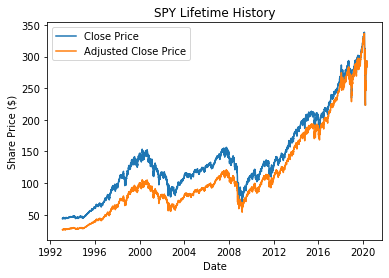

In [5]:
# Visualize Data
plt.plot(df_spy['Date'],df_spy['Close'])
plt.plot(df_spy['Date'],df_spy['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.legend(['Close Price','Adjusted Close Price'])
plt.title('SPY Lifetime History')
plt.show()

# Obtain VOO Data

In [6]:
# Import VOO data (inception date to present) from Yahoo Finance

# Inception Date (Yahoo Finance)
voo_start = datetime.datetime(2010,9,7)

# Today's Date
voo_end = datetime.date.today()

# Pull Data
df_voo = web.DataReader('VOO','yahoo',voo_start,voo_end)

# Reset index after creating date column
df_voo = df_voo.reset_index()
df_voo

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-09-09,102.500000,101.139999,102.500000,101.320000,26500.0,83.143929
1,2010-09-10,101.860001,101.300003,101.680000,101.779999,8600.0,83.521400
2,2010-09-13,103.139999,102.500000,102.959999,103.059998,33700.0,84.571770
3,2010-09-14,103.480003,102.379997,102.839996,103.040001,59400.0,84.555374
4,2010-09-15,103.379997,102.400002,102.620003,103.300003,9200.0,84.768715
...,...,...,...,...,...,...,...
2428,2020-05-04,260.899994,256.529999,257.920013,260.640015,4128900.0,260.640015
2429,2020-05-05,265.809998,262.600006,263.450012,263.040009,4437200.0,263.040009
2430,2020-05-06,265.109985,261.140015,264.709991,261.269989,3021400.0,261.269989
2431,2020-05-07,266.299988,263.899994,264.450012,264.359985,3410200.0,264.359985


In [7]:
# Create columns for year, month, and day
df_voo['Year'] = pd.DatetimeIndex(df_voo['Date']).year
df_voo['Month'] = pd.DatetimeIndex(df_voo['Date']).month
df_voo['Day'] = pd.DatetimeIndex(df_voo['Date']).day

# Drop High, Low, Open, and Volume columns
df_voo = df_voo.drop(['High','Low','Open','Volume'],axis=1)

df_voo

,Date,Close,Adj Close,Year,Month,Day
0,2010-09-09,101.320000,83.143929,2010,9,9
1,2010-09-10,101.779999,83.521400,2010,9,10
2,2010-09-13,103.059998,84.571770,2010,9,13
3,2010-09-14,103.040001,84.555374,2010,9,14
4,2010-09-15,103.300003,84.768715,2010,9,15
...,...,...,...,...,...,...
2428,2020-05-04,260.640015,260.640015,2020,5,4
2429,2020-05-05,263.040009,263.040009,2020,5,5
2430,2020-05-06,261.269989,261.269989,2020,5,6
2431,2020-05-07,264.359985,264.359985,2020,5,7


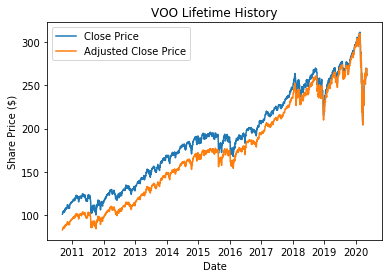

In [8]:
# Visualize Data
plt.plot(df_voo['Date'],df_voo['Close'])
plt.plot(df_voo['Date'],df_voo['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.legend(['Close Price','Adjusted Close Price'])
plt.title('VOO Lifetime History')
plt.show()

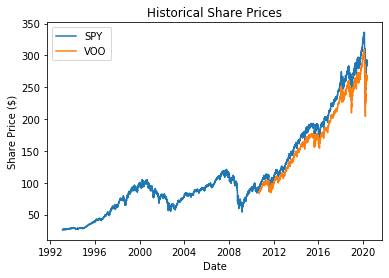

In [9]:
# SPY and VOO
plt.plot(df_spy['Date'],df_spy['Adj Close'],'C0')
plt.plot(df_voo['Date'],df_voo['Adj Close'],'C1')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.legend(['SPY','VOO'])
plt.title('Historical Share Prices')
plt.show()

# Dollar Cost Averaging (DCA) Implementation

Invest $1000 per month in ETF. Once every month, randomly choose one day to purchase the maximum number of shares allowed with available buying power

In [10]:
def calc_dca(stock_data, dollars, num_months):
    # stock_data = historical data for stock
    # dollars = recurring monthly investment
    # num_months = number of months to calculate return for
    
    # Get date range (inception date to current)
    
    # First Date of Historical Date (First Trading Date - Not necessarily inception date)
    min_year = min(stock_data['Date']).year
    min_month = min(stock_data['Date']).month
    min_day = min(stock_data['Date']).day
    
    # Last Date of Historical Date (Current Date)
    max_year = max(stock_data['Date']).year
    max_month = max(stock_data['Date']).month
    max_day = max(stock_data['Date']).day

    # If inception month is December, use January aka month = 1
    # otherwise use the next month, aka month+1
    # this is to account for an incomplete month when getting random date
    if min_month == 12:
        l_lim_month = 1
        l_lim_year = min_year+1
    else:
        l_lim_month = min_month+1
        l_lim_year = min_year

    # If current month is January, subtract num_months+1 months from current 
    # ie. aka December from two years ago if num_months = 12
    # this is to account for an incomplete month
    quot = num_months//12 # number of full years
    rem = num_months%12 # remaining number of months
    
    if max_month == 1:
        u_lim_month_temp = 12
        u_lim_year_temp = max_year-1
    else:
        u_lim_month_temp = max_month-1
        u_lim_year_temp = max_year
    
    if rem > 0:        
        u_lim_month = 12-abs(u_lim_month_temp-rem)+1
        u_lim_year = u_lim_year_temp-quot
    else:
        u_lim_month = u_lim_month_temp
        u_lim_year = u_lim_year_temp-quot
    
    
    # List of valid months for randomized sampling
    num_months_start = 12-l_lim_month+1 # number of full months in the first year
    num_months_end = u_lim_month # number of full months in current year
    num_months_between = (u_lim_year-l_lim_year-1)*12

    num_months_total = num_months_start+num_months_end+num_months_between

    # start year
    s_y = []
    for a in range(num_months_start):
        year = l_lim_year
        month = a+l_lim_month
        s_y.append([year,month])

    # end year
    e_y = []
    for b in range(num_months_end):
        year = u_lim_year
        month = b+1
        e_y.append([year,month])

    # between years
    b_y = []
    for c in range(u_lim_year-l_lim_year-1):
        year = l_lim_year+c+1
        for j in range(12):
            month = j+1
            b_y.append([year,month])

    # all years
    a_y = s_y+b_y+e_y

    # Randomly select month to start investing
    rand_int = np.random.random_integers(0,num_months_total-1) # randomly select inclusive to bounds
    invest_start_year = a_y[rand_int][0]
    invest_start_month = a_y[rand_int][1]
    
    # Initalize variables
    year = [] # year of purchase
    month = [] # month of purchase
    day = [] # day of purchase
    deposit = np.zeros(num_months) # deposit
    invested = np.zeros(num_months) # total capital invested
    close_price = [] # closing price on date of purchase
    buy_pow_before = np.zeros(num_months) # buying power before purchase
    num_pur = np.zeros(num_months) # number of shares purchased
    num_owned_close = np.zeros(num_months) # number of shares owned after purchase
    num_owned_value = np.zeros(num_months) # value of total shares owned
    buy_pow_after = np.zeros(num_months) # buying power after purchase
    port_value = np.zeros(num_months) # portfolio value after purchase

    # Get randomized dates in each month
    # Get number of trading days

    # Create list of months for analysis
    months_analysis = []
    for i in range(num_months):
        if i == 0:
            analysis_year = invest_start_year
            analysis_month = invest_start_month
        elif months_analysis[i-1][1] == 12:
            analysis_year = months_analysis[i-1][0]+1
            analysis_month = 1
        else:
            analysis_year = months_analysis[i-1][0]
            analysis_month = months_analysis[i-1][1] + 1
        months_analysis.append([analysis_year,analysis_month])


    # Loop to randomly select one trading day in each month and get adjusted closing price and date
    for d in range(len(months_analysis)):
        temp = stock_data.loc[(stock_data['Year']==months_analysis[d][0]) & (stock_data['Month']==months_analysis[d][1])]
        rand_sample = pd.DataFrame.sample(temp)
        rand_sample_reset_ind = rand_sample.reset_index()
        months_analysis[d].append(rand_sample_reset_ind['Date'][0].day)
        months_analysis[d].append(rand_sample_reset_ind['Adj Close'][0])

    # 
    for e in range(num_months):
        year.append(months_analysis[e][0])
        month.append(months_analysis[e][1])
        day.append(months_analysis[e][2])
        deposit[e] += dollars
        close_price.append(months_analysis[e][3])
        if e == 0:
            invested[e] += dollars
            buy_pow_before[e] += dollars
            num_pur[e] += (buy_pow_before[e]//close_price[e])
            num_owned_close[e] += (num_pur[e])
            num_owned_value[e] += (close_price[e]*num_owned_close[e])
            buy_pow_after[e] += (buy_pow_before[e]-(num_pur[e]*close_price[e]))
            port_value[e] += (num_owned_value[e]+buy_pow_after[e])
        else:
            invested[e] += (invested[e-1]+deposit[e])
            buy_pow_before[e] += (deposit[e]+buy_pow_after[e-1])
            num_pur[e] += (buy_pow_before[e]//close_price[e])
            num_owned_close[e] += (num_owned_close[e-1]+num_pur[e])
            num_owned_value[e] += (close_price[e]*num_owned_close[e])
            buy_pow_after[e] += (buy_pow_before[e]-(num_pur[e]*close_price[e]))
            port_value[e] += (num_owned_value[e]+buy_pow_after[e])

    portfolio = pd.DataFrame(list(zip(year,month,day,deposit,close_price,invested,buy_pow_before,num_pur,
                                     num_owned_close,num_owned_value,buy_pow_after,port_value)),
                            columns = ['Year','Month','Day','Deposit','Close Price','Invested',
                                      'Buying Power Before','Number of Shares Purchased',
                                      'Number of Shares Owned at Close','Value of Number of Shares Owned',
                                      'Buying Power after','Portfolio Value'])

    ROI = (port_value[-1]-invested[-1])/invested[-1]
    
    return ROI

# SPY Simulation

In [11]:
# SPY 12-month simulation
num_iter = 20000
stock_data = df_spy
dollars = 1000
num_months = 12
spy12_sim_dat = []

for k in range(num_iter):
    x = calc_dca(stock_data, dollars, num_months)
    spy12_sim_dat.append(100*x)

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: DeprecationWarning: This function is deprecated. Please call randint(0, 314 + 1) instead


(-40, 30)

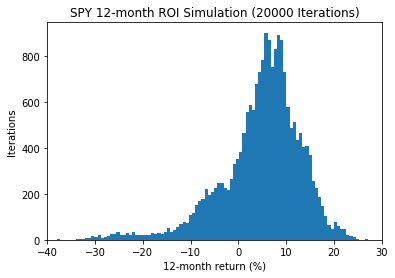

In [12]:
spy_hist = plt.hist(spy12_sim_dat,bins='auto')
plt.title('SPY ' + str(num_months) + '-month ROI Simulation (' + str(num_iter) + ' Iterations)')
plt.xlabel(str(num_months) + '-month return (%)')
plt.ylabel('Iterations')
plt.xlim([-40,30])

In [13]:
# Statistics
spy12_stat = pd.Series(spy12_sim_dat).describe()

In [14]:
# SPY 60-month simulation
num_iter = 20000
stock_data = df_spy
dollars = 1000
num_months = 60
spy60_sim_dat = []

for k in range(num_iter):
    x = calc_dca(stock_data, dollars, num_months)
    spy60_sim_dat.append(100*x)

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: DeprecationWarning: This function is deprecated. Please call randint(0, 266 + 1) instead


(-50, 110)

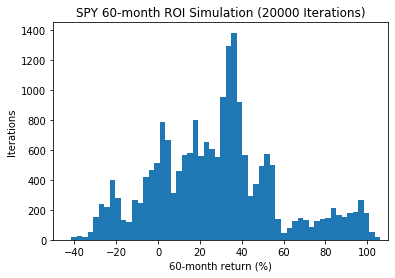

In [15]:
spy_hist = plt.hist(spy60_sim_dat,bins='auto')
plt.title('SPY ' + str(num_months) + '-month ROI Simulation (' + str(num_iter) + ' Iterations)')
plt.xlabel(str(num_months) + '-month return (%)')
plt.ylabel('Iterations')
plt.xlim([-50,110])

In [16]:
# Statistics
spy60_stat = pd.Series(spy60_sim_dat).describe()

# VOO Simulation

In [17]:
# VOO 12-month simulation
num_iter = 10000
stock_data = df_voo
dollars = 1000
num_months = 12
voo12_sim_dat = []

for k in range(num_iter):
    x = calc_dca(stock_data, dollars, num_months)
    voo12_sim_dat.append(100*x)

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: DeprecationWarning: This function is deprecated. Please call randint(0, 102 + 1) instead


(-40, 30)

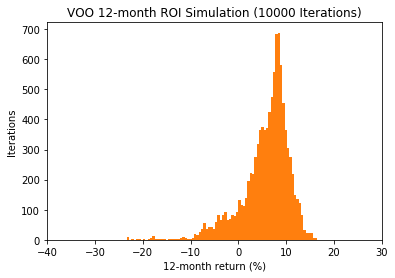

In [18]:
voo_hist = plt.hist(voo12_sim_dat,bins='auto',color='C1')
plt.title('VOO ' + str(num_months) + '-month ROI Simulation (' + str(num_iter) + ' Iterations)')
plt.xlabel(str(num_months) + '-month return (%)')
plt.ylabel('Iterations')
plt.xlim([-40,30])

In [19]:
# Statistics
voo12_stat = pd.Series(voo12_sim_dat).describe()

In [20]:
# VOO 60-month simulation
num_iter = 10000
stock_data = df_voo
dollars = 1000
num_months = 60
voo60_sim_dat = []

for k in range(num_iter):
    x = calc_dca(stock_data, dollars, num_months)
    voo60_sim_dat.append(100*x)

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: DeprecationWarning: This function is deprecated. Please call randint(0, 54 + 1) instead


(-50, 110)

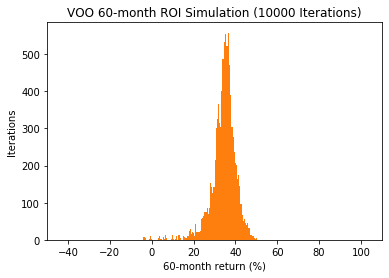

In [21]:
voo_hist = plt.hist(voo60_sim_dat,bins='auto',color='C1')
plt.title('VOO ' + str(num_months) + '-month ROI Simulation (' + str(num_iter) + ' Iterations)')
plt.xlabel(str(num_months) + '-month return (%)')
plt.ylabel('Iterations')
plt.xlim([-50,110])

In [22]:
# Statistics
voo60_stat = pd.Series(voo60_sim_dat).describe()

In [23]:
stat_12 = pd.concat([spy12_stat,voo12_stat],axis=1)
stat_12.columns = ['SPY','VOO']
stat_12.drop(['count'])

,SPY,VOO
mean,4.835290,5.794401
std,8.439565,4.974558
min,-37.990679,-23.370971
25%,1.096024,3.700996
50%,6.053805,6.976162
75%,10.039269,8.936903
max,27.168728,16.485067


In [24]:
stat_60 = pd.concat([spy60_stat,voo60_stat],axis=1)
stat_60.columns = ['SPY','VOO']
stat_60.drop(['count'])

,SPY,VOO
mean,27.883005,34.417106
std,29.553922,5.930463
min,-41.471978,-3.939725
25%,5.876389,31.823121
50%,29.337236,35.086169
75%,41.744492,37.682920
max,106.217828,50.515304
